In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [9]:
start_time = '2140-01-01'
end_time = '2150-01-01'

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/39243/status,
Dashboard: /proxy/39243/status,Workers: 4
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34257,Workers: 4
Dashboard: /proxy/39243/status,Total threads: 8
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:42701,Total threads: 2
Dashboard: /proxy/37989/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:46041,


In [4]:
session = cc.database.create_session()

In [10]:
# laod warming + wind experiment (u)
u_wthp = cc.querying.getvar(expt='01deg_jra55v13_ryf9091_qian_wthp', variable='u', 
                          session=session, frequency='1 monthly',
                          start_time='2100-01-31 00:00:00', 
                          end_time='2149-12-31 00:00:00').sel(yu_ocean = slice(-90,-50)).sel(time = slice(start_time,end_time))

In [11]:
# laod warming + wind experiment (u)
u_wthmp = cc.querying.getvar(expt='01deg_jra55v13_ryf9091_qian_wthmp', variable='u', 
                          session=session, frequency='1 monthly',
                          start_time='2100-01-31 00:00:00', 
                          end_time='2149-12-31 00:00:00').sel(yu_ocean = slice(-90,-50)).sel(time = slice(start_time,end_time))

distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


In [12]:
uwthp = u_wthp.mean('time').load()

distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [13]:
uwthmp = u_wthmp.mean('time').load()

In [14]:
# select transects
# control
uwthp1 = uwthp.sel(xu_ocean = -30, method = 'nearest')
uwthp2 = uwthp.sel(xu_ocean = 30, method = 'nearest')
uwthp3 = uwthp.sel(xu_ocean = 75, method = 'nearest')
uwthp4 = uwthp.sel(xu_ocean = -270, method = 'nearest')
uwthp5 = uwthp.sel(xu_ocean = -210, method = 'nearest')
uwthp6 = uwthp.sel(xu_ocean = -180, method = 'nearest')
uwthp7 = uwthp.sel(xu_ocean = -130, method = 'nearest')

# melting case
uwthmp1 = uwthmp.sel(xu_ocean = -30, method = 'nearest')
uwthmp2 = uwthmp.sel(xu_ocean = 30, method = 'nearest')
uwthmp3 = uwthmp.sel(xu_ocean = 75, method = 'nearest')
uwthmp4 = uwthmp.sel(xu_ocean = -270, method = 'nearest')
uwthmp5 = uwthmp.sel(xu_ocean = -210, method = 'nearest')
uwthmp6 = uwthmp.sel(xu_ocean = -180, method = 'nearest')
uwthmp7 = uwthmp.sel(xu_ocean = -130, method = 'nearest')

Text(0, 0.5, 'zonal velocity (m/s)')

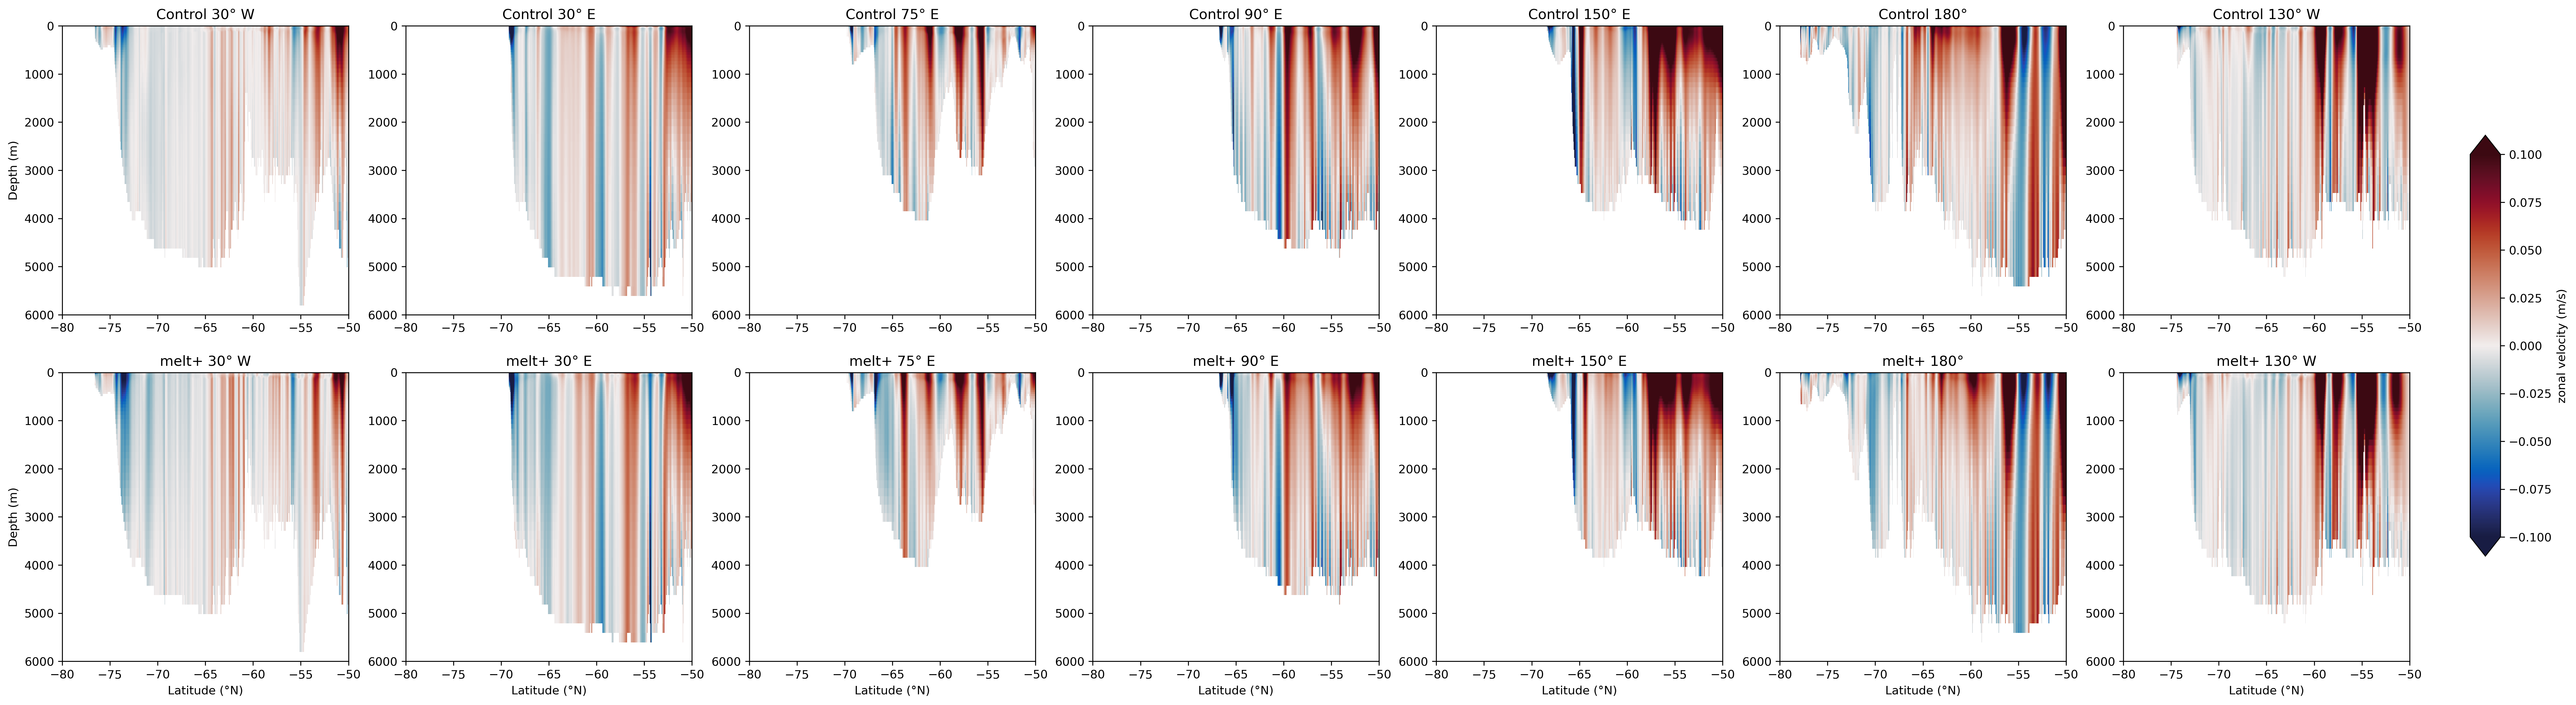

In [18]:
plt.figure(figsize=(36,10),dpi = 300)
# control
#30W
ax = plt.subplot(2,7,1)
p1 = uwthp1.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('Depth (m)')
ax.set_title('Control 30° W')
#30E
ax = plt.subplot(2,7,2)
p1 = uwthp2.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 30° E')
#75E
ax = plt.subplot(2,7,3)
p1 = uwthp3.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 75° E')
#90E
ax = plt.subplot(2,7,4)
p1 = uwthp4.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 90° E')
#150E
ax = plt.subplot(2,7,5)
p1 = uwthp5.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 150° E')

#180
ax = plt.subplot(2,7,6)
p1 = uwthp6.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 180°')

#130W
ax = plt.subplot(2,7,7)
p1 = uwthp7.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 130° W')

# up 10
#30W
ax = plt.subplot(2,7,8)
p1 = uwthmp1.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
plt.xlabel('Latitude (°N)')
plt.ylabel('Depth (m)')
ax.set_title('melt+ 30° W')

# 30E
ax = plt.subplot(2,7,9)
p1 = uwthmp2.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
plt.xlabel('Latitude (°N)')
ax.set(ylabel=None)
ax.set_title('melt+ 30° E')

# 75E
ax = plt.subplot(2,7,10)
p1 = uwthmp3.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
plt.xlabel('Latitude (°N)')
ax.set(ylabel=None)
ax.set_title('melt+ 75° E')

# 90E
ax = plt.subplot(2,7,11)
p1 = uwthmp4.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
plt.xlabel('Latitude (°N)')
ax.set(ylabel=None)
ax.set_title('melt+ 90° E')

# 150E
ax = plt.subplot(2,7,12)
p1 = uwthmp5.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
plt.xlabel('Latitude (°N)')
ax.set(ylabel=None)
ax.set_title('melt+ 150° E')

# 180
ax = plt.subplot(2,7,13)
p1 = uwthmp6.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(ylabel=None)
ax.set_title('melt+ 180°')
plt.xlabel('Latitude (°N)')

# 130W
ax = plt.subplot(2,7,14)
p1 = uwthmp7.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(ylabel=None)
ax.set_title('melt+ 130° W')
plt.xlabel('Latitude (°N)')

# add colorbar
ax = plt.axes([0.92, 0.25, 0.01, 0.5])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('zonal velocity (m/s)')